In [11]:
# Brute Force Algorithm

def minimum_dominating_set(G):
  """
  Enumerates all possible subsets of vertices of the graph using bit manipulation
  and keeps track of the smallest subset found and returns it as the minimum dominating set of the graph
  """
  smallest_set = set()
  smallest_cardinality = float('inf') # represents positive infinity 
  n = len(G) # n is the number of vertices in the graph
    
  # Enumerate all possible subsets
  # using bit manipulation
  for i in range(2**n):

    subset = set() # a subset of vertices is initialized

    # Loop through all elements
    # of the input graph
    for j in range(n):

      # If the jth bit is set,
      # add the jth vertex to the subset W
      if i & (1 << j):
        subset.add(j)

    # Update the current smallest subset 
    if is_dominating(G, subset) and len(subset) < smallest_cardinality:
      smallest_set = subset
      smallest_cardinality = len(subset)
  
  return smallest_set

In [12]:
# A dominating set in a graph is a set of vertices such that 
# every vertex outside the set is adjacent to a vertex in the set
def is_dominating(G, W):
  """
  Checks if a given set of vertices W is a dominating set for a graph G
  """
  for v in G:
    # Check every vertex outside the set 
    # if it is adjacent to a vertex in the set
    if v not in W:
      is_neighbor_in_W = False
      for u in G[v]:
        if u in W:
          is_neighbor_in_W = True
          break
      if not is_neighbor_in_W:
        return False
  return True

In [13]:
# Greedy Heuristic Algorithm

def greedy_algorithm(graph):
  h = 0 # h denotes the iteration number
  v0 = max(graph, key=lambda v: len(graph[v]))  # Find a vertex with maximum degree 
  S = {v0}

  while not is_dominating(graph, S):  # Check if S is a dominating set
    h += 1
    neighbors = {v for v in graph if v not in S}
    vh = max(neighbors, key=lambda v: active_degree(graph, v, S))  # Find a vertex with maximum active degree
                                                                  # Active degree of a vertex does not take into account the vertices already 
                                                                 # belonging to set S(h−1) and the vertices adjacent to a vertex in set S(h−1)
    S.add(vh)

  return S


def active_degree(graph, v, S):
  """
  Finds an active degree for a given vertex v
  An active degree of vertex v is a derivation of the degree of that vertex in graph G 
  that does not take into account the vertices already belonging to set S(h−1) and the vertices adjacent to a vertex in set S(h−1). 
  """
  return sum(1 for u in graph[v] if u in S and not any(w in S for w in graph[u]))

In [14]:
import random

nodes=[5, 10, 15, 20, 25]
prob=[0.25, 0.5, 0.75]

def generate_random_graph(n, p):
  """
  Generates a random undirected graph with n vertices and an edge probability p
  Returns a dictionary with vertices as keys and adjacent vertices as values
  """
  graph = {i: set() for i in range(n)}  # Initialize graph with all vertices and no edges
  for i in range(n):
    for j in range(i+1, n):  # Only iterate over j > i to avoid adding duplicate edges
      if random.random() < p:
        graph[i].add(j)
        graph[j].add(i)  # Add edge in both directions
  return graph

graphs=[]

for node in nodes:
  for p in prob:
    graphs.append(generate_random_graph(node,p))

for g in graphs:
  print(g)

{0: {2}, 1: {3, 4}, 2: {0}, 3: {1}, 4: {1}}
{0: {1, 2, 3, 4}, 1: {0, 2}, 2: {0, 1, 3, 4}, 3: {0, 2}, 4: {0, 2}}
{0: {1, 3, 4}, 1: {0, 4}, 2: {3, 4}, 3: {0, 2, 4}, 4: {0, 1, 2, 3}}
{0: {3, 6, 7, 8, 9}, 1: {9, 2, 7}, 2: {1, 9, 6, 7}, 3: {0, 4}, 4: {3, 5}, 5: {4, 7}, 6: {0, 2}, 7: {0, 1, 2, 5}, 8: {0}, 9: {0, 1, 2}}
{0: {1, 2, 3, 7, 8, 9}, 1: {0, 4, 5, 6}, 2: {0, 8, 4, 9}, 3: {0, 8, 6, 9}, 4: {1, 2, 5, 6, 7, 9}, 5: {8, 1, 4}, 6: {1, 3, 4, 7, 8}, 7: {0, 8, 4, 6}, 8: {0, 2, 3, 5, 6, 7, 9}, 9: {0, 2, 3, 4, 8}}
{0: {1, 2, 3, 4, 5, 6, 7, 8, 9}, 1: {0, 2, 3, 4, 5, 8, 9}, 2: {0, 1, 3, 4, 5, 6, 7, 8}, 3: {0, 1, 2, 4, 5, 6, 8}, 4: {0, 1, 2, 3, 5, 6, 8, 9}, 5: {0, 1, 2, 3, 4, 6, 7, 8}, 6: {0, 2, 3, 4, 5, 8, 9}, 7: {0, 2, 5, 8, 9}, 8: {0, 1, 2, 3, 4, 5, 6, 7, 9}, 9: {0, 1, 4, 6, 7, 8}}
{0: {12, 6}, 1: {3, 5, 6, 12, 14}, 2: {12, 14}, 3: {8, 1, 11, 9}, 4: {8, 12, 13}, 5: {1}, 6: {0, 1, 7, 8, 12}, 7: {8, 6, 14}, 8: {3, 4, 6, 7}, 9: {11, 3, 14}, 10: {11, 14}, 11: {3, 9, 10, 12, 13}, 12: {0, 1, 2, 4, 6, 

In [15]:
# Printing the results
# The minimum dominating set is found by the Brute Force Algorithm
# The greedy dominating set is found by the Greedy Heuristic Algorithm
min_set1 = set()
min_set2 = set()
for i in range(15):
  min_set1 = greedy_algorithm(graphs[i])
  min_set2 = minimum_dominating_set(graphs[i])
  print("\nThe size of graph", i+1, "is: ", len(graphs[i]))
  print("\nMinimum Dominating Set: ", min_set2, "\tCardinality", len(min_set2))
  print("\nGreedy Dominating Set: ", min_set1, "\tCardinality", len(min_set1))
  print("----------")
  print()


The size of graph 1 is:  5

Minimum Dominating Set:  {0, 1} 	Cardinality 2

Greedy Dominating Set:  {0, 1, 3} 	Cardinality 3
----------


The size of graph 2 is:  5

Minimum Dominating Set:  {0} 	Cardinality 1

Greedy Dominating Set:  {0} 	Cardinality 1
----------


The size of graph 3 is:  5

Minimum Dominating Set:  {4} 	Cardinality 1

Greedy Dominating Set:  {4} 	Cardinality 1
----------


The size of graph 4 is:  10

Minimum Dominating Set:  {0, 1, 4} 	Cardinality 3

Greedy Dominating Set:  {0, 1, 2, 3, 4} 	Cardinality 5
----------


The size of graph 5 is:  10

Minimum Dominating Set:  {0, 1} 	Cardinality 2

Greedy Dominating Set:  {8, 0, 1} 	Cardinality 3
----------


The size of graph 6 is:  10

Minimum Dominating Set:  {0} 	Cardinality 1

Greedy Dominating Set:  {0} 	Cardinality 1
----------


The size of graph 7 is:  15

Minimum Dominating Set:  {1, 11, 12, 6} 	Cardinality 4

Greedy Dominating Set:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12} 	Cardinality 12
----------


The size 

In [16]:
import math 

def calculate_statistics(runtimes, num):
  """
  Calculates the statistical measures
  required for constructing a 90% confidence interval
  as part of the performance testing of the heuristic algorithm 
  """
  sum = 0.0
  avg = 0.0
  var = 0.0 
  stdev = 0.0
  tvalue90 = 1.660

  for i in range(num):
    sum += runtimes[i]

  avg = sum/num

  for i in range(num):
    var += (runtimes[i] - avg)*(runtimes[i] - avg);

  var = var/num
  stdev = math.sqrt(var)

  stderror = stdev/math.sqrt(num)
  confint90_1 = avg - tvalue90*stderror
  confint90_2 = avg + tvalue90*stderror

  print("mean:", avg, " stdev:", stdev, " stderror:", stderror, 
        " 90% CL:", confint90_1, "-", confint90_2)

In [17]:
# Section 6: Performance Testing
# Perfoming 50 runs for 50, 100, 200, 300, and 500 vertices for a fixed edge probability p=0.5

import time
import random

nodes=[50, 100, 200, 300, 500]
prob=[0.5] # Edge probability is fixed to p=0.5 so that the only independent variable in the experiment is the the input size

def generate_random_graph(n, p):
  """
  Generates a random undirected graph with n vertices and an edge probability p
  Returns a dictionary with vertices as keys and adjacent vertices as values
  """
  graph = {i: set() for i in range(n)}  # Initialize graph with all vertices and no edges
  for i in range(n):
    for j in range(i+1, n):  # Only iterate over j > i to avoid adding duplicate edges
      if random.random() < p:
        graph[i].add(j)
        graph[j].add(i)  # Add edge in both directions
  return graph

graphs=[]

# Generate 50 graphs of each input size
for node in nodes:
  for p in prob:
    for i in range(50):
      graphs.append(generate_random_graph(node,p))


runtimes = []
min_set = set()
for i in range(250):
  start_time = time.time()
  min_set = greedy_algorithm(graphs[i])
  end_time = time.time()
  running_time = end_time - start_time
  runtimes.append(running_time) # Append the running time of the heuristic algorithm in each graph instance
                               # Since there are 50 runs for 50, 100, 200, 300, and 500 vertices
                              # there are 50 * 5 = 250 running time results appended to the runtimes array


num=50 # We have 50 runs for each input size
runtimes_50vertices = runtimes[0:50] # Taking the first 50 runtime results, which correspond to the graphs with 50 vertices
runtimes_100vertices = runtimes[50:100] # Taking the next 50 runtime results, which correspond to the graphs with 100 vertices
runtimes_200vertices = runtimes[100:150] 
runtimes_300vertices = runtimes[150:200] 
runtimes_500vertices = runtimes[200:250]

# Printing the results of the statistical measures to experimentally analyze the running time of our algorithm
print("Running time statistics of 50 runs for 50 vertices:")
calculate_statistics(runtimes_50vertices, num)
print("\nRunning time statistics of 50 runs for 100 vertices:")
calculate_statistics(runtimes_100vertices, num)
print("\nRunning time statistics of 50 runs for 200 vertices:")
calculate_statistics(runtimes_200vertices, num)
print("\nRunning time statistics of 50 runs for 300 vertices:")
calculate_statistics(runtimes_300vertices, num)
print("\nRunning time statistics of 50 runs for 500 vertices:")
calculate_statistics(runtimes_500vertices, num)

Running time statistics of 50 runs for 50 vertices:
mean: 0.0007995367050170898  stdev: 0.0002803975875595954  stderror: 3.9654207118347724e-05  90% CL: 0.0007337107212006327 - 0.000865362688833547

Running time statistics of 50 runs for 100 vertices:
mean: 0.003006448745727539  stdev: 0.0008429532582462292  stderror: 0.00011921159302584074  90% CL: 0.0028085575013046434 - 0.0032043399901504344

Running time statistics of 50 runs for 200 vertices:
mean: 0.012347917556762695  stdev: 0.0025191893728877934  stderror: 0.00035626717773240893  90% CL: 0.011756514041726895 - 0.012939321071798494

Running time statistics of 50 runs for 300 vertices:
mean: 0.02828535556793213  stdev: 0.0060268758147350296  stderror: 0.0008523289515936675  90% CL: 0.026870489508286643 - 0.029700221627577617

Running time statistics of 50 runs for 500 vertices:
mean: 0.08012857913970947  stdev: 0.019398221973874  stderror: 0.00274332286013764  90% CL: 0.07557466319188098 - 0.08468249508753796


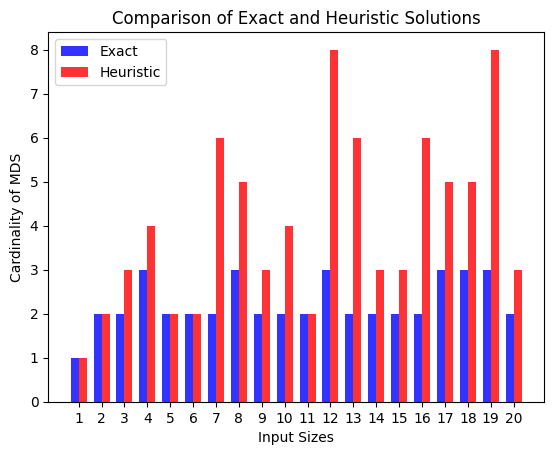

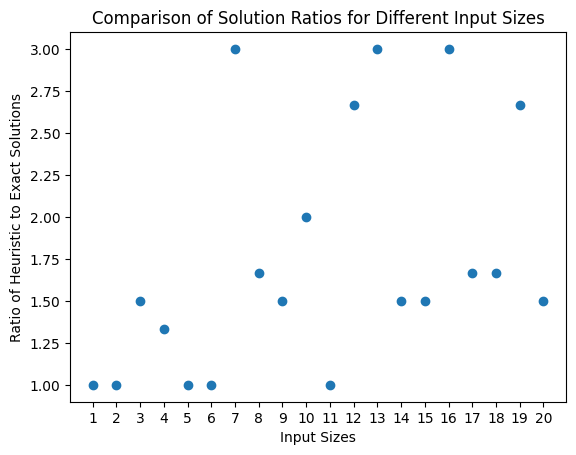

In [18]:
# Section 7: Experimental Analysis of the Quality

import matplotlib.pyplot as plt
import numpy as np

# Generating Graphs 
nodes=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
prob=[0.5] # Edge probability is fixed to p=0.5 so that the only independent variable in the experiment is the the input size

def generate_random_graph(n, p):
  """
  Generates a random undirected graph with n vertices and an edge probability p
  Returns a dictionary with vertices as keys and adjacent vertices as values
  """
  graph = {i: set() for i in range(n)}  # Initialize graph with all vertices and no edges
  for i in range(n):
    for j in range(i+1, n):  # Only iterate over j > i to avoid adding duplicate edges
      if random.random() < p:
        graph[i].add(j)
        graph[j].add(i)  # Add edge in both directions
  return graph

graphs=[]

for node in nodes:
  for p in prob:
    graphs.append(generate_random_graph(node,p))


# Generating the MDS results
# The minimum dominating set is found by the Brute Force Algorithm
# The greedy dominating set is found by the Greedy Heuristic Algorithm
min_set1 = set()
min_set2 = set()
# Appending the cardinality of the MDS results to the respective solutions array
exact_solutions = []
heuristic_solutions = []
for i in range(20):
  min_set1 = greedy_algorithm(graphs[i])
  min_set2 = minimum_dominating_set(graphs[i])
  exact_solutions.append(len(min_set2))
  heuristic_solutions.append(len(min_set1))


# Plotting a bar chart 
# Displaying the experimental results of the brute force and heuristic algorithms

input_sizes = list(range(1, 21))  # There are 20 input sizes with a fixed edge probability of 0.5
bar_width = 0.35  
opacity = 0.8

fig, ax = plt.subplots()

for i, size in enumerate(input_sizes):
    x_pos = i

    ax.bar(x_pos - bar_width/2, exact_solutions[i], 
           bar_width, alpha=opacity, color='b', label='Exact' if i == 0 else "")
    ax.bar(x_pos + bar_width/2, heuristic_solutions[i], 
           bar_width, alpha=opacity, color='r', label='Heuristic' if i == 0 else "")

ax.set_xlabel('Input Sizes')
ax.set_ylabel('Cardinality of MDS')
ax.set_title('Comparison of Exact and Heuristic Solutions')
ax.set_xticks(range(len(input_sizes)))  
ax.set_xticklabels(input_sizes)  
ax.legend()

plt.show()


# Plotting a scatter chart
# Displaying the ratios of heuristic to exact solutions in terms of the cardinalities

# Calculating the ratios
ratios = [h / e for h, e in zip(heuristic_solutions, exact_solutions)]

# Plotting the scatter chart
plt.scatter(input_sizes, ratios)
plt.xlabel('Input Sizes')
plt.ylabel('Ratio of Heuristic to Exact Solutions')
plt.title('Comparison of Solution Ratios for Different Input Sizes')
plt.xticks(range(min(input_sizes), max(input_sizes) + 1))

plt.show()

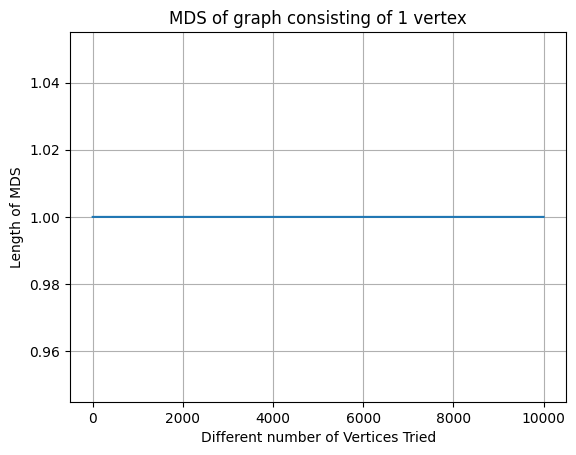

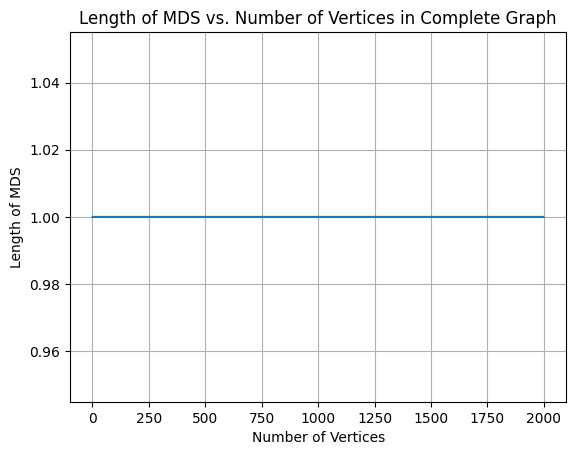

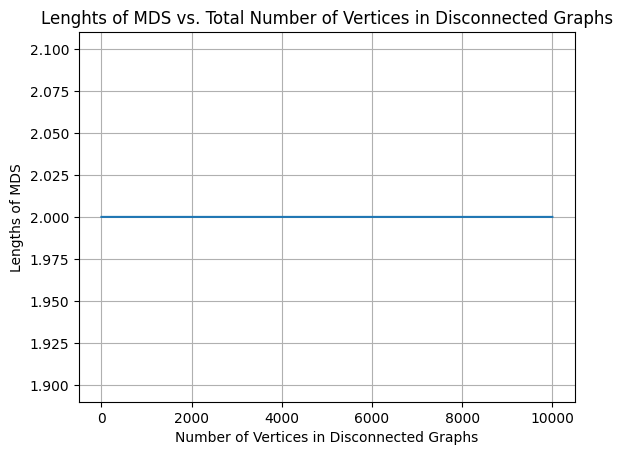


Graph is :  {0: set()}

 {0} is a minimum dominating set with cardinality 1 


Graph is :  {0: set(), 1: set()}

 {0, 1} is a minimum dominating set with cardinality 2 


Graph is :  {0: {1, 2}, 1: {0, 2}, 2: {0, 1, 3}, 3: {2}}

 {2} is a minimum dominating set with cardinality 1 


Graph is :  {0: {1, 2, 3}, 1: {0, 2, 4}, 2: {0, 1}, 3: {0}, 4: {1}}

 {0, 1} is a minimum dominating set with cardinality 2 


Graph is :  {0: {1, 3, 4}, 1: {0}, 2: {3, 4}, 3: {0, 2, 4, 5}, 4: {0, 2, 3, 5}, 5: {3, 4}}

 {0, 3} is a minimum dominating set with cardinality 2 


Graph is :  {0: {1, 3, 5, 6}, 1: {0, 5, 6}, 2: {3, 4, 5, 6}, 3: {0, 2, 5}, 4: {2, 5, 6}, 5: {0, 1, 2, 3, 4, 6}, 6: {0, 1, 2, 4, 5}}

 {5} is a minimum dominating set with cardinality 1 


Graph is :  {0: {1, 2, 3, 4, 6, 7, 8}, 1: {0, 3, 5, 6, 7, 8}, 2: {0, 8, 4, 5}, 3: {0, 1, 4, 5, 6, 7, 8}, 4: {0, 2, 3, 7, 8}, 5: {8, 1, 2, 3}, 6: {0, 1, 3, 7}, 7: {0, 1, 3, 4, 6}, 8: {0, 1, 2, 3, 4, 5}}

 {0, 1} is a minimum dominating set with cardin

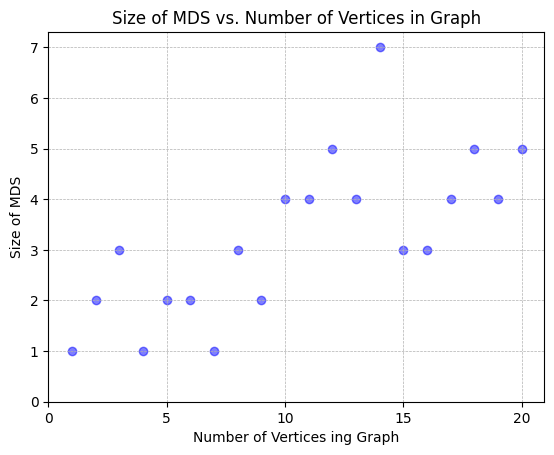

In [19]:
# Section 8: Functional Testing

import random
import matplotlib.pyplot as plt

# Generating Graphs

nodes=[5, 10, 15, 20, 25]
prob=[0.25, 0.5, 0.75]

def generate_random_graph(n, p):
    """
    Generates a random undirected graph with n vertices and edge probability p.
    Returns a dictionary with vertices as keys and adjacent vertices as values.
    """
    graph = {i: set() for i in range(n)}  # Initialize graph with all vertices and no edges
    for i in range(n):
        for j in range(i+1, n):  # Only iterate over j > i to avoid adding duplicate edges
            if random.random() < p:
                graph[i].add(j)
                graph[j].add(i)  # Add edge in both directions
    return graph

graphs=[]

for node in nodes:
  for p in prob:
    graphs.append(generate_random_graph(node,p))


# Functional Testing for Graphs with Single Vertex
# The output is the vertex itself -> MDS cardinality is always 1
lengths = []
num_vertices = []

for i in range(1, 10001):
    set1 = {i: set()}
    m=greedy_algorithm(set1)
    lengths.append(len(m))
    num_vertices.append(i)

plt.plot(num_vertices, lengths)
plt.xlabel('Different number of Vertices Tried')
plt.ylabel('Length of MDS')
plt.title('MDS of graph consisting of 1 vertex')
plt.grid(True)
plt.show()

# Functional Testing with Complete Graphs  
# Output should be any one of the vertices with set cardinality 1
lengths = []
num_vertices = []
for n in range(1,2000):
    g = {v: set(range(n)) - {v} for v in range(n)}
    m=greedy_algorithm(g)
    lengths.append(len(m))
    num_vertices.append(n)

plt.plot(num_vertices, lengths)
plt.xlabel('Number of Vertices')
plt.ylabel('Length of MDS')
plt.title('Length of MDS vs. Number of Vertices in Complete Graph')
plt.grid(True)
plt.show()

# Functional Testing with Disconnected Graphs   
# 0utput should be exactly 2
lengths = []
num_vertices = []
for n in range(2,10001):
    for j in range(0, n, n//2):  # Number of vertices in each component
        g={}
        g[0] = set(range(1, j))
        g[j] = set(range(j+1, n+1))
        m=greedy_algorithm(g)
        if(len(m)==1): # when cardinality of m=1, there exists a node in the acyclic graph
            continue   # such that it has |V|-1 edges, hence it is not disconnected
        else:
            lengths.append(len(m))
            num_vertices.append(n)
        
plt.plot(num_vertices, lengths)
plt.xlabel('Number of Vertices in Disconnected Graphs')
plt.ylabel('Lengths of MDS')
plt.title('Lenghts of MDS vs. Total Number of Vertices in Disconnected Graphs')
plt.grid(True)
plt.show()

# Functional Testing with Random Graphs   
# Output should be 1 or 2 and G must be equal to MDS
lengths = []
num_vertices = []
graphs=[]

for n in range(1,21):
    graphs.append(generate_random_graph(n,0.5))

for i in range(len(graphs)):
    g=greedy_algorithm(graphs[i])
    m=minimum_dominating_set(graphs[i])
    lengths.append(len(g))
    num_vertices.append(len(graphs[i]))
    if(len(g)<=2 and len(g)==len(m)):
        print("\nGraph is : ", graphs[i])
        print("\n",g,"is a minimum dominating set with cardinality",len(g),"\n")

plt.scatter(num_vertices, lengths, marker='o', color='b', alpha=0.5)
plt.xlabel('Number of Vertices ing Graph')
plt.ylabel('Size of MDS')
plt.title('Size of MDS vs. Number of Vertices in Graph')
plt.xticks(range(0, max(num_vertices) + 2, 5))
plt.yticks(range(0, max(lengths) + 1, 1))
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
plt.show()